# 20 September 2021

# Simple Linear Regression

### **Analyze mpg data from seaborn**

    - Horsepower as independent variable
    - mpg as dependent variable
### - Analyze the relationship
### - Apply Simple Linear Regression
### - Perform F-test and T-test
### - Interpret the result
### - Use α 5%  


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## The data concerns city-cycle fuel consumption in miles per gallon.

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [6]:
df[['mpg', 'horsepower']].describe()

,mpg,horsepower
count,392.000000,392.000000
mean,23.445918,104.469388
std,7.805007,38.491160
min,9.000000,46.000000
25%,17.000000,75.000000
50%,22.750000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


In [7]:
df[['mpg', 'horsepower']].corr()

,mpg,horsepower
mpg,1.000000,-0.778427
horsepower,-0.778427,1.000000


## **Interpretasi**

Apa arti korelasi -0.77?

- Bernilai negatif, itu berarti hubungannya berbanding terbalik. Semakin besar horsepower, maka semakin kecil nilai mpg.
- Nilai -0.77 termasuk ke dalam moderate correlation.

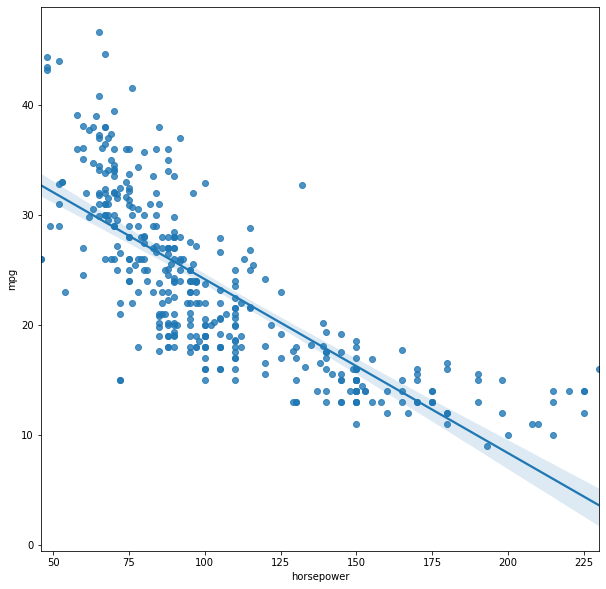

In [8]:
plt.figure(figsize=(10,10))
sns.regplot(x = 'horsepower', y = 'mpg', data = df);

> ## **Simple Linear Regression**

Untuk mengaplikasikan simple linear regression pada dataset sesuai dengan instruksi soal, berarti:

- X: horsepower<br>
- y: mpg

In [9]:
X = df['horsepower']
y = df['mpg']

In [10]:
sm_lm = sm.OLS(df['mpg'], sm.add_constant(df[['horsepower']]))
result = sm_lm.fit()

In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           7.03e-81
Time:                        19:55:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

## **Interpretasi**

* Nilai F-test statistic digunakan untuk melihat apakah ada pengaruh signifikan antara mpg dengan horsepower. Apakah horsepower itu memengaruhi nilai mpg?<br><br>

* Karena nilai Prob (F-statistic) nya < 0.05, yaitu 7.03e-81, maka dapat dikatakan bahwa kita menolak null hypotesis, yang mana null hypothesis-nya adalah tidak ada pengaruh signifikan antara horsepower dengan mpg. Dengan kata lain, berdasarkan uji statistik, ada cukup bukti kalau horsepower itu memengaruhi nilai mpg.<br><br>

* Coeff constant adalah nilai intercept (39.9359), tapi dalam kasus ini dapat diabaikan, karena tidak ada mobil dalam kondisi normal dengan horsepower 0.<br><br>

* Coeff horsepower = -0.1578. Ini berarti untuk tiap kenaikan satu horsepower, nilai mpg akan berkurang sebanyak 0.1578.<br><br>

* P>|t| = 0.000, yang mana ini adalah nilai partial test (T-test). Karena nilainya < 0.05 (lebih kecil dari significance level), maka dapat dikatakan semakin tinggi horsepower, semakin rendah pula nilai mpg dari tipe mobil tersebut.<br><br>

* Nilai r-squared sebesar 0.606, itu berarti model simple linear regression yang hanya menggunakan 'horsepower' sebagai fitur, dapat menjelaskan sekitar 60.6% variasi dari nilai mpg.

## **Untuk melihat hasil nilai prediksi dari model**

In [12]:
y_true = y.reset_index().drop(columns='index')
y_true

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


In [13]:
y_predict = result.predict()
yhat = pd.DataFrame(data=y_predict, columns=['prediction'])
yhat

,prediction
0,19.416046
1,13.891480
2,16.259151
3,16.259151
4,17.837598
...,...
387,26.361214
388,31.727935
389,26.676903
390,27.466127


In [14]:
y_merged = [y_true, yhat]

pd.concat(y_merged, axis=1, join='inner')

,mpg,prediction
0,18.0,19.416046
1,15.0,13.891480
2,18.0,16.259151
3,16.0,16.259151
4,17.0,17.837598
...,...,...
387,27.0,26.361214
388,44.0,31.727935
389,32.0,26.676903
390,28.0,27.466127


## **Mengecek nilai RMSE model**

In [15]:
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y_true, yhat)
rmse

array([4.89322623])